**Downloading the text corpora**

In [ ]:
!wget https://www.dropbox.com/s/1agrh5hdnkqd24c/en_wiki.txt?dl=0        # downloads the dataset
!mv en_wiki.txt?dl=0 en_data.txt

--2020-09-30 05:28:25--  https://www.dropbox.com/s/1agrh5hdnkqd24c/en_wiki.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1agrh5hdnkqd24c/en_wiki.txt [following]
--2020-09-30 05:28:26--  https://www.dropbox.com/s/raw/1agrh5hdnkqd24c/en_wiki.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce3a244e94afe080cb7389b7826.dl.dropboxusercontent.com/cd/0/inline/BAWOJ0OrwhVwJMmXy_DH4DV-kAwJZdNBfgthfdJPpWNTisnJRmCoODNSy0PDNUQP-gM3Ckq0aQewH0GG220gVcWMrCe74l-WJKuckoCnjXXkztrPn-3ZBUBAGg6irSXMqKw/file# [following]
--2020-09-30 05:28:26--  https://uce3a244e94afe080cb7389b7826.dl.dropboxusercontent.com/cd/0/inline/BAWOJ0OrwhVwJMmXy_DH4DV-kAwJZdNBfgthfdJPpWNTisnJRmCoODNSy0PDNUQP-gM3Ckq0aQewH0GG220gVcWMrCe74l-WJKuckoCnjXXkz

In [ ]:
!wget https://www.dropbox.com/s/xrx4r9ep28lq5jp/hi_wiki.txt?dl=0
!mv hi_wiki.txt?dl=0 hi_data.txt

--2020-09-30 05:28:34--  https://www.dropbox.com/s/xrx4r9ep28lq5jp/hi_wiki.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xrx4r9ep28lq5jp/hi_wiki.txt [following]
--2020-09-30 05:28:34--  https://www.dropbox.com/s/raw/xrx4r9ep28lq5jp/hi_wiki.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc312f48fecde0bb0ca55d217f5e.dl.dropboxusercontent.com/cd/0/inline/BAW-E8rlTgMH4xXOtAGtlJvzJUtloqyxBD40qV6D-_1LCaqqvlXFnPnQtFaLdb0OZ57X92rGsawr9ExBJQZUwyb8KuleLjyjn_95wAA2MiQTMgH4x84WeMI8qid7AFMEBYs/file# [following]
--2020-09-30 05:28:35--  https://uc312f48fecde0bb0ca55d217f5e.dl.dropboxusercontent.com/cd/0/inline/BAW-E8rlTgMH4xXOtAGtlJvzJUtloqyxBD40qV6D-_1LCaqqvlXFnPnQtFaLdb0OZ57X92rGsawr9ExBJQZUwyb8KuleLjyjn_95wAA2MiQTM

In [ ]:
file_en = "en_data.txt"
file_hi = "hi_data.txt"

In [ ]:
# reading the downloaded data and storing them in strings

with open(file_en, "r") as file1:
    en_FileContent = file1.read()

with open(file_hi, "r") as file2:
    hi_FileContent = file2.read()

**SECTION 1.3.1**

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')  # in order to make "nltk.tokenize.word_tokenize" work

!pip install spacy
!python -m spacy download en_core_web_sm
from spacy.lang.en import English

from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
# Analysis using NLTK
sent_tokens_en = nltk.sent_tokenize(en_FileContent)
tokens_en = nltk.word_tokenize(en_FileContent)

display(Markdown("##Analysis of English corpus using NLTK library"))
display(Markdown("###No of sentences after sentence segmentation are: {}".format(len(sent_tokens_en))))
display(Markdown("###Example sentences formed are:"))
print(sent_tokens_en[0:20])
display(Markdown("###No of word tokens after word tokenization are: {}".format(len(tokens_en))))
display(Markdown("###Example tokens formed are:"))
print(tokens_en[0:20])

# Analysis using spacy
nlp = English()
sentencizer = nlp.create_pipe("sentencizer")          # sentencizer is a faster and more memory efficient method in spacy for segmentation and tokenization
nlp.max_length = 30000000                             # spacy by default limits to a text of max length 1000000 which is insufficient for our purpose. Can be increased further if maximum length exceeded error comes
nlp.add_pipe(sentencizer)
doc = nlp(en_FileContent[0:len(en_FileContent)//4])   # due to memory constraints in Colab, we are using 1/4th of the text corpus

sents_list = list(doc.sents)
tokens_list = []
for token in doc:
  tokens_list.append(token)

display(Markdown("##Analysis of English corpus(1/4th of the corpus used) using Spacy library"))
display(Markdown("###No of sentences after sentence segmentation are: {}".format(len(sents_list))))
display(Markdown("###Example sentences formed are:"))
print(sents_list[0:20])
display(Markdown("###No of word tokens after word tokenization are: {}".format(len(tokens_list))))
display(Markdown("###Example tokens formed are:"))
print(tokens_list[0:20])



##Analysis of English corpus using NLTK library

###No of sentences after sentence segmentation are: 761582

###Example sentences formed are:

['The word "atom" was coined by ancient Greek philosophers.', 'However, these ideas were founded in philosophical and theological reasoning rather than evidence and experimentation.', 'As a result, their views on what atoms look like and how they behave were incorrect.', 'They also could not convince everybody, so atomism was but one of a number of competing theories on the nature of matter.', 'It was not until the 19th century that the idea was embraced and refined by scientists, when the blossoming science of chemistry produced discoveries that only the concept of atoms could explain.', 'In the early 1800s, John Dalton used the concept of atoms to explain why elements always react in ratios of small whole numbers (the law of multiple proportions).', 'For instance, there are two types of tin oxide: one is 88.1% tin and 11.9% oxygen and the other is 78.7% tin and 21.3% oxygen (tin(II) oxide and tin dioxide respectively).', 'This means that 100g of tin will combine either with 13.5g or 

###No of word tokens after word tokenization are: 19602236

###Example tokens formed are:

['The', 'word', '``', 'atom', "''", 'was', 'coined', 'by', 'ancient', 'Greek', 'philosophers', '.', 'However', ',', 'these', 'ideas', 'were', 'founded', 'in', 'philosophical']


##Analysis of English corpus(1/4th of the corpus used) using Spacy library

###No of sentences after sentence segmentation are: 212133

###Example sentences formed are:

[The word "atom" was coined by ancient Greek philosophers., However, these ideas were founded in philosophical and theological reasoning rather than evidence and experimentation., As a result, their views on what atoms look like and how they behave were incorrect., They also could not convince everybody, so atomism was but one of a number of competing theories on the nature of matter., It was not until the 19th century that the idea was embraced and refined by scientists, when the blossoming science of chemistry produced discoveries that only the concept of atoms could explain., 

In the early 1800s, John Dalton used the concept of atoms to explain why elements always react in ratios of small whole numbers (the law of multiple proportions)., For instance, there are two types of tin oxide: one is 88.1% tin and 11.9% oxygen and the other is 78.7% tin and 21.3% oxygen (tin(II) oxide and tin dioxide respectively)., This means that 100g of tin will combine either with 13.5g or 27g of oxygen

###No of word tokens after word tokenization are: 5229511

###Example tokens formed are:

[The, word, ", atom, ", was, coined, by, ancient, Greek, philosophers, ., However, ,, these, ideas, were, founded, in, philosophical]


In [ ]:
!pip install indic-nlp-library
from indicnlp.tokenize import sentence_tokenize, indic_tokenize
del doc                                                           # free the previous use of this variable(used earlier for English, not needed further)
from spacy.lang.hi import Hindi

In [ ]:
# Analysis using Indic-NLP
sent_tokens_hi = sentence_tokenize.sentence_split(hi_FileContent, lang='hi')
tokens_hi = indic_tokenize.trivial_tokenize(hi_FileContent)

display(Markdown("##Analysis of Hindi corpus using Indic-NLP library"))
display(Markdown("###No of sentences after sentence segmentation are: {}".format(len(sent_tokens_hi))))
display(Markdown("###Example sentences formed are:"))
print(sent_tokens_hi[0:20])
display(Markdown("###No of word tokens after word tokenization are: {}".format(len(tokens_hi))))
display(Markdown("###Example tokens formed are:"))
print(tokens_hi[0:20])

# Analysis using Spacy (1/4th of the corpus used)
nlp = Hindi()
sentencizer = nlp.create_pipe("sentencizer")    
nlp.max_length = 30000000                             # spacy by default limits to a text of max length 1000000 which is insufficient for our purpose. Can be increased further is maximum length exceeded error comes
nlp.add_pipe(sentencizer)
doc = nlp(hi_FileContent[0:len(hi_FileContent)//4])   # due to memory constraints in Colab, we are using 1/4th of the text corpus

# free the previous instance of Spacy Analysis(not needed further)
del sents_list
del tokens_list

sents_list = list(doc.sents)
tokens_list = []
for token in doc:
  tokens_list.append(token)

display(Markdown("##Analysis of Hindi corpus(1/4th of the corpus used) using Spacy library"))
display(Markdown("###No of sentences after sentence segmentation are: {}".format(len(sents_list))))
display(Markdown("###Example sentences formed are:"))
print(sents_list[0:20])
display(Markdown("###No of word tokens after word tokenization are: {}".format(len(tokens_list))))
display(Markdown("###Example tokens formed are:"))
print(tokens_list[0:20])

##Analysis of Hindi corpus using Indic-NLP library

###No of sentences after sentence segmentation are: 348593

###Example sentences formed are:

['मास्टर ऑफ़ हेल्थ एडमिनिस्ट्रेशन या मास्टर ऑफ हेल्थकेयर एडमिनिस्ट्रेशन (एमएचए या एम. एच. ए) स्नातकोत्तर (पोस्ट ग्रेजुएशन) की एक पेशेवर डिग्री है जो स्वास्थ्य प्रशासन के क्षेत्र में दी जाती हैं।', 'यह उन छात्रों को प्रदान की जाती हैं जिन्होंने स्वास्थ्य प्रशासन, अस्पताल प्रबंधन एवं अन्य स्वास्थ्य सेवा संगठनों के क्षेत्र में जरूरी ज्ञान और दक्षता हासिल की हैं।', 'इन पाठ्यक्रमो में परिस्थितियों के अनुसार इनके सरंचना में अंतर हो सकता हैं हालांकि व्यवसायी-शिक्षक मॉडल कार्यक्रम आमतौर पर चिकित्सा, स्वास्थ्य व्यवसायों या संबद्ध स्वास्थ्य के कॉलेजों में पाए जाते हैं, कक्षा-आधारित कार्यक्रम व्यवसाय या सार्वजनिक स्वास्थ्य के कॉलेजों में होते हैं।', 'इस पाठ्यक्रम के अध्ययन के दौरान आम तौर पर विद्यार्थियों को जनसंख्या स्वास्थ्य, स्वास्थ्य देखभाल अर्थशास्त्र, स्वास्थ्य नीति, संगठनात्मक व्यवहार, स्वास्थ्य से जुड़े संगठनों के प्रबंधन, स्वास्थ्य विपणन और संचार, मानव संसाधन प्रबंधन, सूचना प्रणाली प्रबंधन के अध्ययन एवं अन्य क्षेत्रों में व्यावहारिक अनुभव की भी आवश्यकता होती है।', 'यह डिग्री प्रोग्राम स्

###No of word tokens after word tokenization are: 8640033

###Example tokens formed are:

['मास्टर', 'ऑफ़', 'हेल्थ', 'एडमिनिस्ट्रेशन', 'या', 'मास्टर', 'ऑफ', 'हेल्थकेयर', 'एडमिनिस्ट्रेशन', '(', 'एमएचए', 'या', 'एम', '.', 'एच', '.', 'ए', ')', 'स्नातकोत्तर', '(']


##Analysis of Hindi corpus(1/4th of the corpus used) using Spacy library

###No of sentences after sentence segmentation are: 88613

###Example sentences formed are:

[मास्टर ऑफ़ हेल्थ एडमिनिस्ट्रेशन या मास्टर ऑफ हेल्थकेयर एडमिनिस्ट्रेशन (एमएचए या एम., एच., ए) स्नातकोत्तर (पोस्ट ग्रेजुएशन) की एक पेशेवर डिग्री है जो स्वास्थ्य प्रशासन के क्षेत्र में दी जाती हैं।, यह उन छात्रों को प्रदान की जाती हैं जिन्होंने स्वास्थ्य प्रशासन, अस्पताल प्रबंधन एवं अन्य स्वास्थ्य सेवा संगठनों के क्षेत्र में जरूरी ज्ञान और दक्षता हासिल की हैं।, इन पाठ्यक्रमो में परिस्थितियों के अनुसार इनके सरंचना में अंतर हो सकता हैं हालांकि व्यवसायी-शिक्षक मॉडल कार्यक्रम आमतौर पर चिकित्सा, स्वास्थ्य व्यवसायों या संबद्ध स्वास्थ्य के कॉलेजों में पाए जाते हैं, कक्षा-आधारित कार्यक्रम व्यवसाय या सार्वजनिक स्वास्थ्य के कॉलेजों में होते हैं।, 

इस पाठ्यक्रम के अध्ययन के दौरान आम तौर पर विद्यार्थियों को जनसंख्या स्वास्थ्य, स्वास्थ्य देखभाल अर्थशास्त्र, स्वास्थ्य नीति, संगठनात्मक व्यवहार, स्वास्थ्य से जुड़े संगठनों के प्रबंधन, स्वास्थ्य विपणन और संचार, मानव संसाधन प्रबंधन, सूचना प्रणाली प्रबंधन के अध्ययन एवं अन्य क्षेत्रों में व्यावहारिक अनुभव की भी आवश्यकता होती है।, यह डिग्री प्रोग्राम स्वास्थ

###No of word tokens after word tokenization are: 2181076

###Example tokens formed are:

[मास्टर, ऑफ़, हेल्थ, एडमिनिस्ट्रेशन, या, मास्टर, ऑफ, हेल्थकेयर, एडमिनिस्ट्रेशन, (, एमएचए, या, एम, ., एच, ., ए, ), स्नातकोत्तर, (]


**N-GRAMS ANALYSIS**

In [ ]:
from nltk.util import ngrams
from collections import Counter
from operator import itemgetter
from collections import OrderedDict
import matplotlib.pyplot as plt

In [ ]:
# Helper functions to for n-grams analysis

# returns a list of ngrams
def extract_ngrams(tokens, num):
    n_grams = ngrams(tokens, num)
    return [ ' '.join(grams) for grams in n_grams]

# returns a dict of ngrams
def get_frequency(tokens,num):
  n_grams = extract_ngrams(tokens,num)
  freq={}
  for i in n_grams:
    freq[i]=freq.get(i,0) + 1
  return freq

####Number of unigrams in English Corpus: 395757

####Number of unigrams in Hindi Corpus: 322350

####Number of bigrams in English Corpus: 4095732

####Number of bigrams in Hindi Corpus: 2392979

####Number of trigrams in English Corpus: 10827502

####Number of trigrams in Hindi Corpus: 5508737

###Frequency distribution of English unigrams

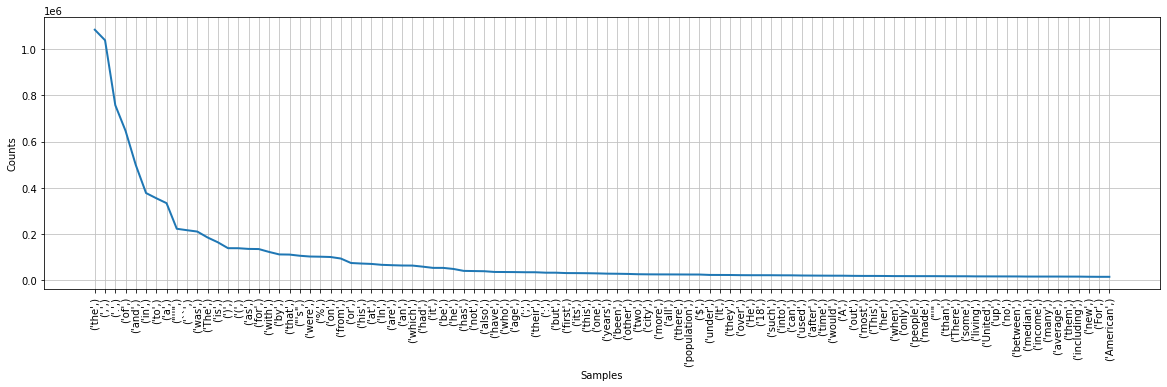

###Frequency distribution of Hindi unigrams

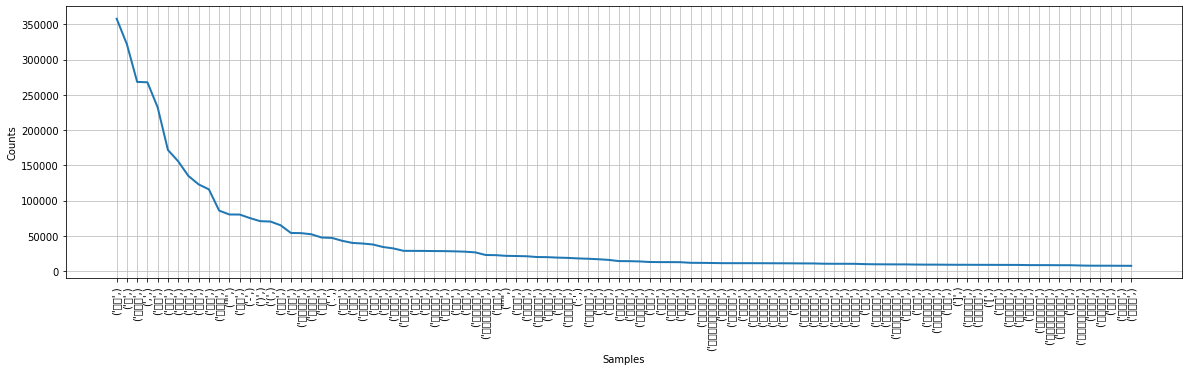

###Frequency distribution of English bigrams

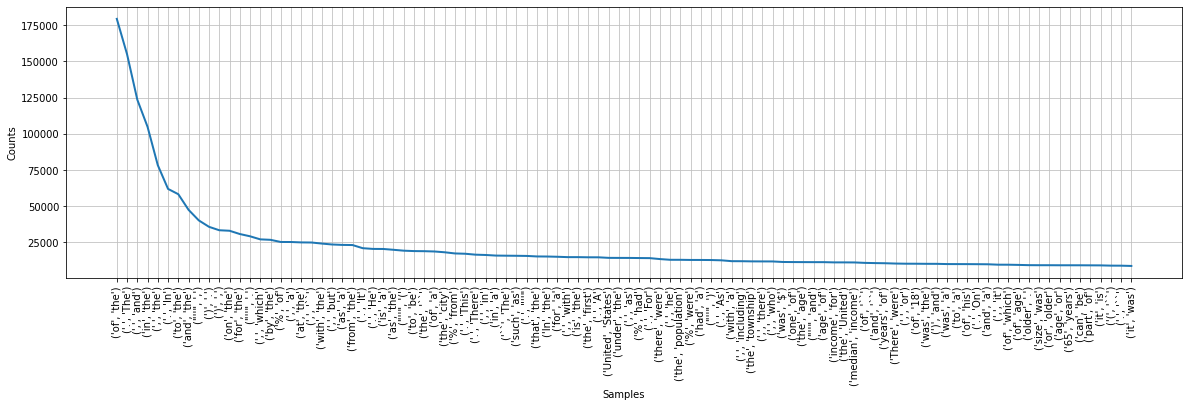

###Frequency distribution of Hindi bigrams

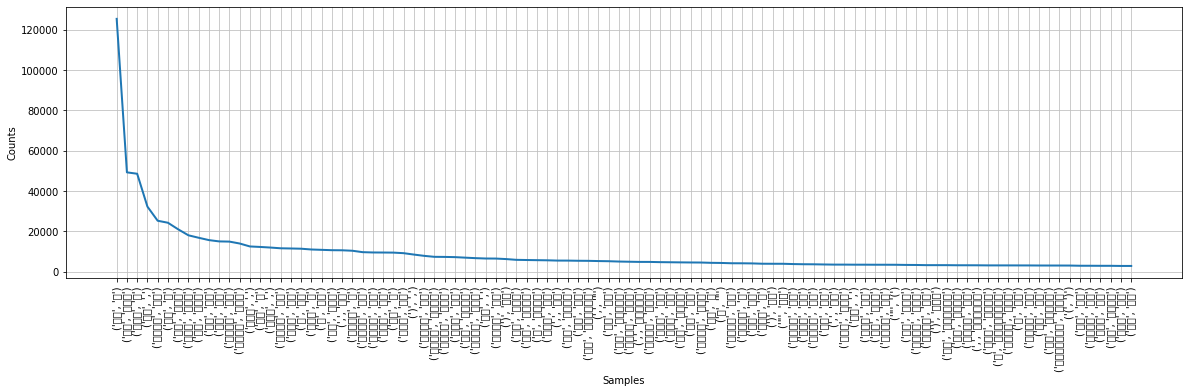

###Frequency distribution of English trigrams

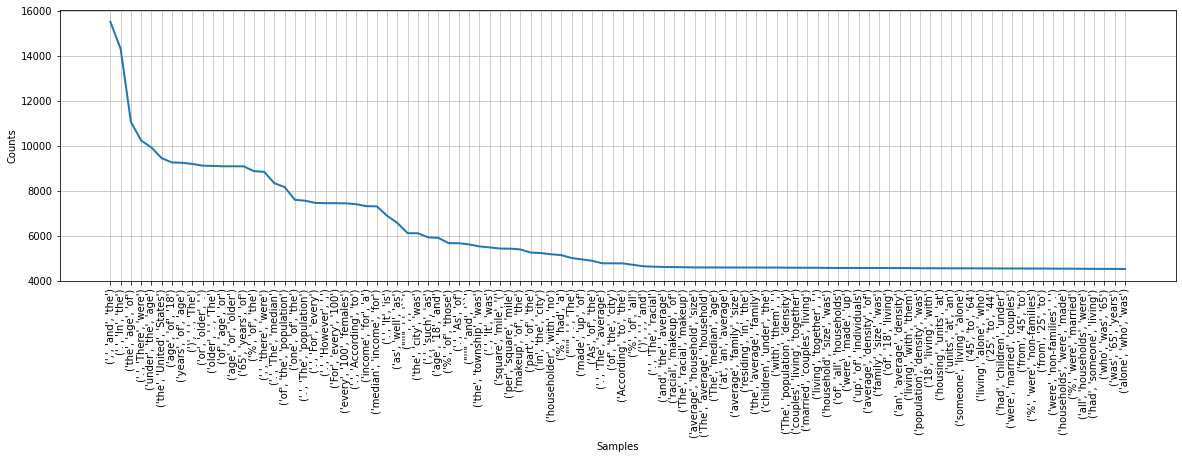

###Frequency distribution of Hindi trigrams

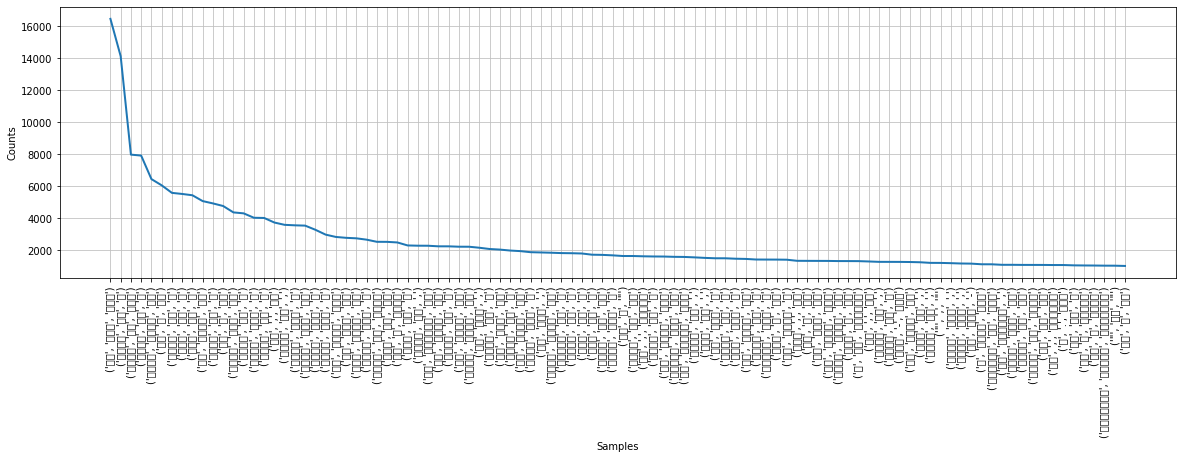

In [ ]:
# # Generating ngrams for English corpus
unigrams_en = ngrams(tokens_en,1)
bigrams_en = ngrams(tokens_en,2)
trigrams_en = ngrams(tokens_en,3)
freq_unigrams_en = get_frequency(tokens_en,1)
freq_bigrams_en = get_frequency(tokens_en,2)
freq_trigrams_en = get_frequency(tokens_en,3)

# # Generating ngrams for Hindi corpus
unigrams_hi = ngrams(tokens_hi,1)
bigrams_hi = ngrams(tokens_hi,2)
trigrams_hi = ngrams(tokens_hi,3)
freq_unigrams_hi = get_frequency(tokens_hi,1)
freq_bigrams_hi = get_frequency(tokens_hi,2)
freq_trigrams_hi = get_frequency(tokens_hi,3)



display(Markdown("####Number of unigrams in English Corpus: {}".format(len(freq_unigrams_en))))
display(Markdown("####Number of unigrams in Hindi Corpus: {}".format(len(freq_unigrams_hi))))
display(Markdown("####Number of bigrams in English Corpus: {}".format(len(freq_bigrams_en))))
display(Markdown("####Number of bigrams in Hindi Corpus: {}".format(len(freq_bigrams_hi))))
display(Markdown("####Number of trigrams in English Corpus: {}".format(len(freq_trigrams_en))))
display(Markdown("####Number of trigrams in Hindi Corpus: {}".format(len(freq_trigrams_hi))))

# Plotting only 100 values of n-grams for better visualization

# Plotting unigrams
display(Markdown("###Frequency distribution of English unigrams"))
freq_dist_uni_en = nltk.FreqDist(unigrams_en)
sorted(freq_dist_uni_en.items(), key=lambda x: x[1], reverse=True)
plt.figure(figsize=(20,5))
freq_dist_uni_en.plot(100)

display(Markdown("###Frequency distribution of Hindi unigrams"))
freq_dist_uni_hi = nltk.FreqDist(unigrams_hi)
sorted(freq_dist_uni_hi.items(), key=lambda x: x[1], reverse=True)
plt.figure(figsize=(20,5))
freq_dist_uni_hi.plot(100)

# Plotting bigrams
display(Markdown("###Frequency distribution of English bigrams"))
freq_dist_bi_en = nltk.FreqDist(bigrams_en)
sorted(freq_dist_bi_en.items(), key=lambda x: x[1], reverse=True)
plt.figure(figsize=(20,5))
freq_dist_bi_en.plot(100)

display(Markdown("###Frequency distribution of Hindi bigrams"))
freq_dist_bi_hi = nltk.FreqDist(bigrams_hi)
sorted(freq_dist_bi_hi.items(), key=lambda x: x[1], reverse=True)
plt.figure(figsize=(20,5))
freq_dist_bi_hi.plot(100)

# Plotting trigrams
display(Markdown("###Frequency distribution of English trigrams"))
freq_dist_tri_en = nltk.FreqDist(trigrams_en)
sorted(freq_dist_tri_en.items(), key=lambda x: x[1], reverse=True)
plt.figure(figsize=(20,5))
freq_dist_tri_en.plot(100)

display(Markdown("###Frequency distribution of Hindi trigrams"))
freq_dist_tri_hi = nltk.FreqDist(trigrams_hi)
sorted(freq_dist_tri_hi.items(), key=lambda x: x[1], reverse=True)
plt.figure(figsize=(20,5))
freq_dist_tri_hi.plot(100)

In [ ]:
x = freq_unigrams_en
y = freq_unigrams_hi

# making a separate dictionary of most frequent and least frequent 100 words in corpora
sorted_en = OrderedDict(sorted(x.items(), key=itemgetter(1)))
sorted_hi = OrderedDict(sorted(y.items(), key=itemgetter(1)))

least_freq_en_100 = [k for k in list(sorted_en)[:100]]
least_freq_hi_100 = [k for k in list(sorted_hi)[:100]]

most_freq_en_100 = [k for k in list(sorted_en)[-100:]]
most_freq_hi_100 = [k for k in list(sorted_hi)[-100:]]

display(Markdown("###Most frequent unigrams in English text are:"))
print(most_freq_en_100)
display(Markdown("###Least frequent unigrams in English text are:"))
print(least_freq_en_100)
display(Markdown("###Most frequent unigrams in Hindi text are:"))
print(most_freq_hi_100)
display(Markdown("###Least frequent unigrams in Hindi text are:"))
print(least_freq_hi_100)

del sorted_en
del sorted_hi
del x
del y

###Most frequent unigrams in English text are:

['American', 'For', 'new', 'including', 'them', 'average', 'many', 'income', 'median', 'between', 'no', 'up', 'United', 'living', 'some', 'There', 'than', "'", 'made', 'people', 'only', 'when', 'her', 'This', 'most', 'out', 'A', 'would', 'time', 'after', 'used', 'can', 'into', 'such', '18', 'He', 'over', 'they', 'It', 'under', '$', 'population', 'there', 'all', 'more', 'city', 'two', 'other', 'been', 'years', 'one', 'this', 'its', 'first', 'but', ':', 'their', ';', 'age', 'who', 'have', 'also', 'not', 'has', 'he', 'be', 'it', 'had', 'which', 'an', 'are', 'In', 'at', 'his', 'or', 'from', 'on', '%', 'were', "'s", 'that', 'by', 'with', 'for', 'as', '(', ')', 'is', 'The', 'was', '``', "''", 'a', 'to', 'in', 'and', 'of', '.', ',', 'the']


###Least frequent unigrams in English text are:

['100g', '13.5g', '27g', 'units—in', 'corpuscle', 'radiochemist', 'transuranium', 'alpha-particle', 'dimensions—on', 'range-properties', 'short-ranged', 'proton–neutron', 'repulsion—the', 'barrier—and', 'nuclei—usually', 'mc', 'non-recoverable', 'nickel—a', '60—is', 'energy-releasing', 'wave—a', 'electron—the', 'energy—is', 'ground-state', '118-proton', 'ununoctium', 'hydrogen-2', 'vanadium-50', 'lanthanum-138', 'tantalum-180m', 'even–even', 'dalton', 'Hydrogen-1', '1.007825', '0.012', 'group-theoretical', 'Aspherical', 'crystal-electrical', 'low-symmetry', 'pyrite-type', 'minuteness', 'conversion—', 'period—the', 'half-life—that', 'spin-½', 'atom—its', 'moment—is', 'Paramagnetic', 'xenon-129', 'direction—a', 'hyperpolarization', 'particle-like', 'spin–orbit', 'uncombined', 'valences', 'electron-sharing', 'super-cooled', 'tunneling-current', 'scanning-tunneling-microscope', 'space-averaged', 'area-selective', 'atom-probe', 'tomograph', 'sub-nanometer', 'Ubiquitousness', 'plasma—a', 'Ba

###Most frequent unigrams in Hindi text are:

['रहे', 'रहा', 'इन', 'उसके', 'तरह', 'प्राप्त', 'कम', 'उन्हें', 'क्षेत्र', 'शामिल', 'हुई', 'जाती', 'बहुत', 'गई', '[', 'होते', 'जैसे', ']', 'दो', 'लेकिन', 'किसी', 'जब', 'कहा', 'प्रकार', 'सबसे', 'पहले', 'गए', 'अपनी', 'वाले', 'अन्य', 'भारत', 'होने', 'कारण', 'कई', 'होती', 'करता', 'उनके', 'इसके', 'एवं', 'सकता', 'नाम', 'उन्होंने', 'अधिक', 'जा', 'समय', 'हुए', 'तो', 'वे', 'करते', 'हुआ', 'कुछ', 'वह', 'थी', 'होता', ':', 'दिया', 'तक', 'बाद', 'अपने', 'तथा', 'थे', "'", 'या', 'द्वारा', 'नहीं', 'हो', 'कर', 'साथ', 'करने', 'जो', 'ही', 'जाता', 'रूप', 'इस', 'यह', 'गया', 'कि', 'था', '.', 'भी', 'लिए', 'किया', 'ने', 'पर', '(', ')', '-', 'एक', '"', 'हैं', 'को', 'का', 'से', 'और', 'की', 'है', ',', 'में', '।', 'के']


###Least frequent unigrams in Hindi text are:

['\n\nएमएचए', '“कमीशन', 'अक्रेदिसन', 'एजुकेशन”', 'सीएएचएमई', 'एचओएम', 'आषधियों', 'पाठ्शालाओं', 'डिग्रीधारीयों', 'हैल्थकेयर', 'सीखाया', 'बीवीएससी', 'बीएचए', '\nअसादुदीन', '\nअसदुद्दीन', 'नजमुनेस्सा', 'मुस्लिममेन', 'राज्वी', 'विज्जी', 'इटैमाद', 'फ़रहीन', 'uddin', 'शास्त्रीपुरम', 'मेलर्देवपल्ली', 'सांडोज़ाई', 'मातृक्षीय', 'जहिद', 'नाकीब', '\nओवैसी', 'जकीउर', 'लखवी', 'तलेक', 'संगारेड्डी', 'मुगलपुरा', 'सलीमुद्दीन', 'पीटाने', 'बिदर', 'अब्दुहाह', 'काशीफ', 'एमएलसी', 'नारा\nराष्ट्रीय', '\n\nउत्कृष्टता', 'लिए\xa0राष्ट्रीय', 'सम्मान\xa0की', 'निभीर्कता', 'बंधनकारी', 'उपलब्धा', 'कलानुशासन', '\nवेदराशि', 'सूत्रसाहित्य', 'अनुक्रमणियों', 'अनुक्रमाणियाँ', 'मंडलांतानुक्रम', 'देवानुक्रम', 'विषयानुसंधान', 'अनुवाकों', 'सर्वानुक्रमणि', 'सर्वज्ञेयार्थ', 'वर्णनात्', 'सर्वानुक्रमणीशब्दं', 'निर्बुवंति', 'विपश्चित', 'वाष्कल', 'सर्वानुक्रमणियाँ', '\n\nसर्वानुक्रमणी', 'कालनिर्णय', 'प्रास्ताविक', 'तत्पूर्व', 'शौनकप्रणीत', 'वृत्तगंधी', 'शौनकीय', 'आर्षानुक्रमणी', 'स्वरूपतः', 'मैक्डोनल', 'अनुवाकानुक्रमणी', '\n\nकात्या

###Zipf's Law for English Text

####Fitted straight line has slope = -1.3942748169093626 and y-intercept = 17.502006319659177

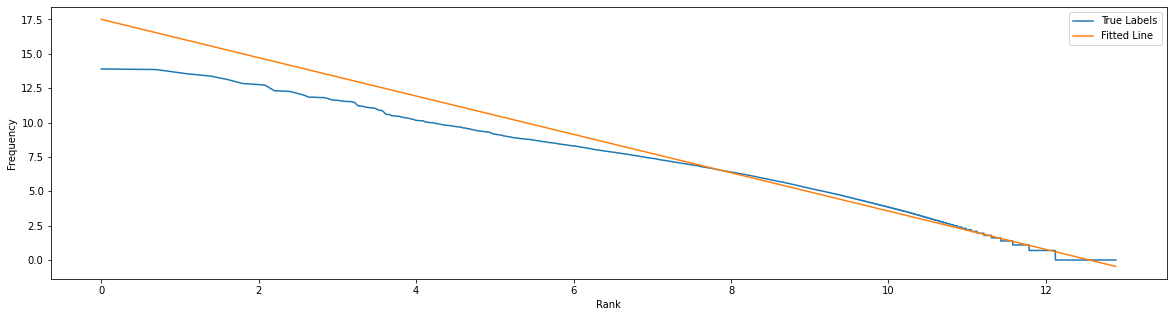

###Zipf's Law for Hindi Text

####Fitted straight line has slope = -1.175844035172983 and y-intercept = 14.429847864942186

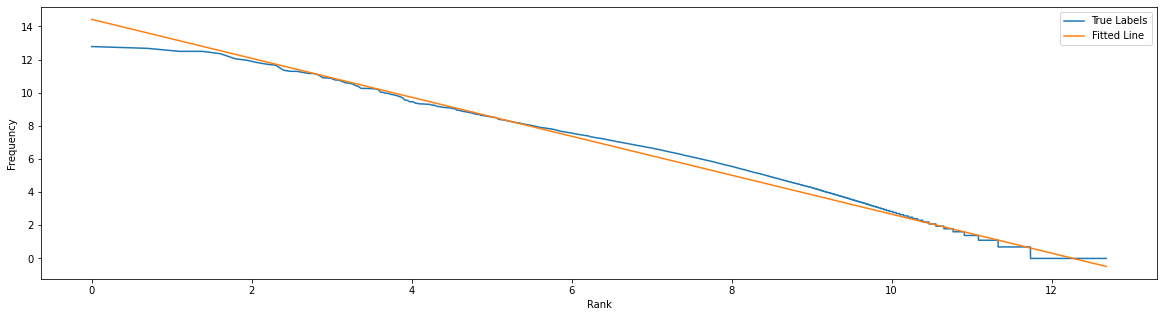

In [ ]:
import numpy as np
# Zipf's law fitting for English Text

rank = [np.log(x) for x in range(1, len(freq_unigrams_en)+1)]
freq = [np.log(value)for key, value in  sorted(freq_unigrams_en.items(), key=lambda x: x[1], reverse=True)]
rank = np.array(rank)
freq = np.array(freq)
slope, intercept = np.polyfit(rank, freq, 1)
display(Markdown("###Zipf's Law for English Text"))
display(Markdown("####Fitted straight line has slope = {} and y-intercept = {}".format(slope, intercept)))
plt.figure(figsize=(20,5))
plt.plot(rank, freq, label='True Labels')
plt.plot(rank, slope*rank+intercept, label='Fitted Line')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.legend()
plt.show()

rank = [np.log(x) for x in range(1, len(freq_unigrams_hi)+1)]
freq = [np.log(value)for key, value in  sorted(freq_unigrams_hi.items(), key=lambda x: x[1], reverse=True)]
rank = np.array(rank)
freq = np.array(freq)
slope, intercept = np.polyfit(rank, freq, 1)
display(Markdown("###Zipf's Law for Hindi Text"))
display(Markdown("####Fitted straight line has slope = {} and y-intercept = {}".format(slope, intercept)))
plt.figure(figsize=(20,5))
plt.plot(rank, freq, label='True Labels')
plt.plot(rank, slope*rank+intercept, label='Fitted Line')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# freeing up space

del unigrams_en
del bigrams_en
del trigrams_en
del unigrams_hi
del bigrams_hi
del trigrams_hi
del freq_dist_uni_en
del freq_dist_bi_en
del freq_dist_tri_en
del freq_dist_uni_hi
del freq_dist_bi_hi
del freq_dist_tri_hi

**SECTION 1.3.2**

In [ ]:
from nltk.stem import PorterStemmer 

In [ ]:
# Helper function to find number of n-grams required to cover frac*100 % of the corpus
def num_freq_words(d,frac,type_ngram,textlen):
  count=0
  cur_len=0
  sorted(d.items(), key=lambda x: x[1], reverse=True)
  for val in d.values():
    cur_len+=val*type_ngram
    count+=1
    if cur_len > frac*textlen:
      break
  return count

# returns stemmed tokens
ps = PorterStemmer()
def stem_tokens(token_list):
  for idx,token in enumerate(token_list):
    token = ps.stem(token)
    token_list[idx] = token
  return token_list;

In [ ]:
words_en = len(tokens_en)
words_hi = len(tokens_hi)

display(Markdown("###No of most frequent unigrams required to cover 90% of English Text is: {}".format(str(num_freq_words(freq_unigrams_en,0.9,1,words_en)))))
display(Markdown("###No of most frequent unigrams required to cover 90% of Hindi Text is: {}".format(str(num_freq_words(freq_unigrams_hi,0.9,1,words_hi)))))
display(Markdown("###No of most frequent bigrams required to cover 80% of English Text is: {}".format(str(num_freq_words(freq_bigrams_en,0.8,2,words_en)))))
display(Markdown("###No of most frequent bigrams required to cover 80% of Hindi Text is: {}".format(str(num_freq_words(freq_bigrams_hi,0.8,2,words_hi)))))
display(Markdown("###No of most frequent trigrams required to cover 70% of English Text is: {}".format(str(num_freq_words(freq_trigrams_en,0.7,3,words_en)))))
display(Markdown("###No of most frequent trigrams required to cover 70% of Hindi Text is: {}".format(str(num_freq_words(freq_trigrams_hi,0.7,3,words_hi)))))

# PERFORM PORTER STEMMING FOR ENGLISH CORPUS
tokens_en = stem_tokens(tokens_en)

# Performing stemming on each token in hindi corpus
suffixes = {
    1: ["ो", "े", "ू", "ु", "ी", "ि", "ा"],
    2: ["कर", "ाओ", "िए", "ाई", "ाए", "ने", "नी", "ना", "ते", "ीं", "ती", "ता", "ाँ", "ां", "ों", "ें"],
    3: ["ाकर", "ाइए", "ाईं", "ाया", "ेगी", "ेगा", "ोगी", "ोगे", "ाने", "ाना", "ाते", "ाती", "ाता", "तीं", "ाओं", "ाएं", "ुओं", "ुएं", "ुआं"],
    4: ["ाएगी", "ाएगा", "ाओगी", "ाओगे", "एंगी", "ेंगी", "एंगे", "ेंगे", "ूंगी", "ूंगा", "ातीं", "नाओं", "नाएं", "ताओं", "ताएं", "ियाँ", "ियों", "ियां"],
    5: ["ाएंगी", "ाएंगे", "ाऊंगी", "ाऊंगा", "ाइयाँ", "ाइयों", "ाइयां"],
}

def stemmer_hi(word):
    for L in range(5, 0, -1):
        if len(word) > L + 1:
            for suf in suffixes[L]:
                if word.endswith(suf):
                    return word[:-L]
    return word

tokens_hi = [stemmer_hi(word) for word in tokens_hi]

# freeing up RAM

del freq_unigrams_en
del freq_unigrams_hi
del freq_bigrams_en
del freq_bigrams_hi
del freq_trigrams_en
del freq_trigrams_hi

freq_unigrams_en = get_frequency(tokens_en,1)
freq_bigrams_en = get_frequency(tokens_en,2)
freq_trigrams_en = get_frequency(tokens_en,3)

freq_unigrams_hi = get_frequency(tokens_hi,1)
freq_bigrams_hi = get_frequency(tokens_hi,2)
freq_trigrams_hi = get_frequency(tokens_hi,3)

words_en = len(tokens_en)
words_hi = len(tokens_hi)

display(Markdown("##After performing Stemming"))

display(Markdown("###No of most frequent unigrams required to cover 90% of English Text is: {}".format(str(num_freq_words(freq_unigrams_en,0.9,1,words_en)))))
display(Markdown("###No of most frequent unigrams required to cover 90% of Hindi Text is: {}".format(str(num_freq_words(freq_unigrams_hi,0.9,1,words_hi)))))
display(Markdown("###No of most frequent bigrams required to cover 80% of English Text is: {}".format(str(num_freq_words(freq_bigrams_en,0.8,2,words_en)))))
display(Markdown("###No of most frequent bigrams required to cover 80% of Hindi Text is: {}".format(str(num_freq_words(freq_bigrams_hi,0.8,2,words_hi)))))
display(Markdown("###No of most frequent trigrams required to cover 70% of English Text is: {}".format(str(num_freq_words(freq_trigrams_en,0.7,3,words_en)))))
display(Markdown("###No of most frequent trigrams required to cover 70% of Hindi Text is: {}".format(str(num_freq_words(freq_trigrams_hi,0.7,3,words_hi)))))

###No of most frequent unigrams required to cover 90% of English Text is: 33731

###No of most frequent unigrams required to cover 90% of Hindi Text is: 30969

###No of most frequent bigrams required to cover 80% of English Text is: 78356

###No of most frequent bigrams required to cover 80% of Hindi Text is: 57677

###No of most frequent trigrams required to cover 70% of English Text is: 436876

###No of most frequent trigrams required to cover 70% of Hindi Text is: 327002

##After performing Stemming

###No of most frequent unigrams required to cover 90% of English Text is: 14063

###No of most frequent unigrams required to cover 90% of Hindi Text is: 19298

###No of most frequent bigrams required to cover 80% of English Text is: 48570

###No of most frequent bigrams required to cover 80% of Hindi Text is: 36785

###No of most frequent trigrams required to cover 70% of English Text is: 424256

###No of most frequent trigrams required to cover 70% of Hindi Text is: 258215

**SECTION 1.3.3**

In [ ]:
# Implementing hueristics dicussed in lecture slides for ENGLISH TEXT

display(Markdown("##HEURISTICS ON ENGLISH TEXT"))

# SENTENCE SEGMENTATION USING HEURISTICS
known_abbr = ["mr", "mrs", "ms", "dr", "jr", "etc", "prof", "eg", "vs", "fig", "phd"]

sent_HueTokens_en = []
curr_read_tokens = []

for index,word in enumerate(en_FileContent.split()):
  curr_read_tokens.append(word)

  # HEURISTIC 1: Check if before the period we have a known abbreviation. If yes, then don't split  
  if (word[-1:] == '.'):
    if (word[:-1].lower() in known_abbr):
      continue
    sent_HueTokens_en.append(' '.join(curr_read_tokens))
    curr_read_tokens = []

  # HEURISTIC 2: Check If a lowercase letter follows a ? or !. If yes, we do not split sentences on that ? or !
  if (word[-1:] == '?' or word[-1:] == '!'):
      if (en_FileContent[index+1][0].isupper()):
        sent_HueTokens_en.append(' '.join(curr_read_tokens))
        curr_read_tokens = []
  
  # HEURISTIC 3: Check If a ending quote follows a ? or !. If yes, we do not split sentences on that ? or !
  if len(word) > 1 and (word[-2:-1] == '?' or word[-2:-1] == '!' or word[-2:-1] == '.'):
      if (word[-1:] == '"'):
        continue
      sent_HueTokens_en.append(' '.join(curr_read_tokens))
      curr_read_tokens = []

display(Markdown("###Number of sentences before applying heuristics is {}".format(len(sent_tokens_en))))
display(Markdown("###Number of sentences after applying heuristics is {}".format(len(sent_HueTokens_en))))

display(Markdown("###New sentence tokens are:"))
print(sent_HueTokens_en[:20])

# WORD TOKENIZATION USING HEURISTICS

HueTokens_en = []

# HEURISTIC 1: Check if a there is one of '.', '?', '!', ',', ';', ':'. If yes, we drop them if they are not preceded by a known abbreviation
for sent in sent_HueTokens_en:
  for word in sent.split():
    if word[-1:] == '.':
      if word[:-1].lower() in known_abbr:
        HueTokens_en.append(word)
      else:
        HueTokens_en.append(word[:-1])
        HueTokens_en.append(word[-1:])
    elif (word[-1:] == '?' or word[-1:] == '!' or word[-1:] == ',' or word[-1:] == ';' or word[-1:] == ':'):
      HueTokens_en.append(word[:-1])
      HueTokens_en.append(word[-1:])
    else:
      HueTokens_en.append(word)

display(Markdown("###Number of word tokens before applying heuristics is {}".format(len(tokens_en))))
display(Markdown("###Number of word tokens after applying heuristics is {}".format(len(HueTokens_en))))

display(Markdown("###New word tokens are:"))
print(HueTokens_en[:20])


##HEURISTICS ON ENGLISH TEXT

###Number of sentences before applying heuristics is 761582

###Number of sentences after applying heuristics is 798448

###New sentence tokens are:

['The word "atom" was coined by ancient Greek philosophers.', 'However, these ideas were founded in philosophical and theological reasoning rather than evidence and experimentation.', 'As a result, their views on what atoms look like and how they behave were incorrect.', 'They also could not convince everybody, so atomism was but one of a number of competing theories on the nature of matter.', 'It was not until the 19th century that the idea was embraced and refined by scientists, when the blossoming science of chemistry produced discoveries that only the concept of atoms could explain.', 'In the early 1800s, John Dalton used the concept of atoms to explain why elements always react in ratios of small whole numbers (the law of multiple proportions).', 'For instance, there are two types of tin oxide: one is 88.1% tin and 11.9% oxygen and the other is 78.7% tin and 21.3% oxygen (tin(II) oxide and tin dioxide respectively).', 'This means that 100g of tin will combine either with 13.5g or 

###Number of word tokens before applying heuristics is 19602236

###Number of word tokens after applying heuristics is 18610493

###New word tokens are:

['The', 'word', '"atom"', 'was', 'coined', 'by', 'ancient', 'Greek', 'philosophers', '.', 'However', ',', 'these', 'ideas', 'were', 'founded', 'in', 'philosophical', 'and', 'theological']


In [ ]:
# Implementing hueristics dicussed in lecture slides for HINDI TEXT

display(Markdown("##HEURISTICS ON HINDI TEXT"))

# SENTENCE SEGMENTATION USING HEURISTICS

sent_HueTokens_hi = []
curr_read_tokens = []

for index,word in enumerate(hi_FileContent.split()):
  curr_read_tokens.append(word)
  
  # HEURISTIC 1: Check If a ending quote follows a ? or !. If yes, we do not split sentences on that ? or !
  if len(word) > 1 and (word[-2:-1] == '?' or word[-2:-1] == '!' or word[-2:-1] == '|'):
      if (word[-1:] == '"'):
        continue
      sent_HueTokens_hi.append(' '.join(curr_read_tokens))
      curr_read_tokens = []

  # HEURISTIC 2: Put putative boundary after occurence of । , ?, !
  if (word[-1:]== '.' or word[-1:]=='।' or word[-1:]=='?' or word[-1:]=='!'):
    sent_HueTokens_hi.append(' '.join(curr_read_tokens))
    curr_read_tokens = []

display(Markdown("###Number of sentences before applying heuristics is {}".format(len(sent_tokens_hi))))
display(Markdown("###Number of sentences after applying heuristics is {}".format(len(sent_HueTokens_hi))))

display(Markdown("###New sentence tokens are:"))
print(sent_HueTokens_hi[:20])

# WORD TOKENIZATION USING HEURISTICS

HueTokens_hi = []

# HEURISTIC 1: Check if a there is one of '.', '?', '!', ',', ';', ':'. If yes, we drop them if they are not preceded by a known abbreviation
for sent in sent_HueTokens_hi:
  for word in sent.split():
    if (word[-1:]== '.' or word[-1:]== '।' or word[-1:]=='?' or word[-1:]=='!' or word[-1:]==',' or word[-1:]==';'):
      HueTokens_hi.append(word[:-1])
      HueTokens_hi.append(word[-1:])
    else:
      HueTokens_hi.append(word)

display(Markdown("###Number of word tokens before applying heuristics is {}".format(len(tokens_hi))))
display(Markdown("###Number of word tokens after applying heuristics is {}".format(len(HueTokens_hi))))

display(Markdown("###New word tokens are:"))
print(HueTokens_hi[:20])

##HEURISTICS ON HINDI TEXT

###Number of sentences before applying heuristics is 348593

###Number of sentences after applying heuristics is 350201

###New sentence tokens are:

['मास्टर ऑफ़ हेल्थ एडमिनिस्ट्रेशन या मास्टर ऑफ हेल्थकेयर एडमिनिस्ट्रेशन (एमएचए या एम.एच.ए) स्नातकोत्तर (पोस्ट ग्रेजुएशन) की एक पेशेवर डिग्री है जो स्वास्थ्य प्रशासन के क्षेत्र में दी जाती हैं।', 'यह उन छात्रों को प्रदान की जाती हैं जिन्होंने स्वास्थ्य प्रशासन, अस्पताल प्रबंधन एवं अन्य स्वास्थ्य सेवा संगठनों के क्षेत्र में जरूरी ज्ञान और दक्षता हासिल की हैं।', 'इन पाठ्यक्रमो में परिस्थितियों के अनुसार इनके सरंचना में अंतर हो सकता हैं हालांकि व्यवसायी-शिक्षक मॉडल कार्यक्रम आमतौर पर चिकित्सा, स्वास्थ्य व्यवसायों या संबद्ध स्वास्थ्य के कॉलेजों में पाए जाते हैं, कक्षा-आधारित कार्यक्रम व्यवसाय या सार्वजनिक स्वास्थ्य के कॉलेजों में होते हैं।', 'इस पाठ्यक्रम के अध्ययन के दौरान आम तौर पर विद्यार्थियों को जनसंख्या स्वास्थ्य, स्वास्थ्य देखभाल अर्थशास्त्र, स्वास्थ्य नीति, संगठनात्मक व्यवहार, स्वास्थ्य से जुड़े संगठनों के प्रबंधन, स्वास्थ्य विपणन और संचार, मानव संसाधन प्रबंधन, सूचना प्रणाली प्रबंधन के अध्ययन एवं अन्य क्षेत्रों में व्यावहारिक अनुभव की भी आवश्यकता होती है।', 'यह डिग्री प्रोग्राम स्वा

###Number of word tokens before applying heuristics is 8640033

###Number of word tokens after applying heuristics is 8186382

###New word tokens are:

['मास्टर', 'ऑफ़', 'हेल्थ', 'एडमिनिस्ट्रेशन', 'या', 'मास्टर', 'ऑफ', 'हेल्थकेयर', 'एडमिनिस्ट्रेशन', '(एमएचए', 'या', 'एम.एच.ए)', 'स्नातकोत्तर', '(पोस्ट', 'ग्रेजुएशन)', 'की', 'एक', 'पेशेवर', 'डिग्री', 'है']


In [ ]:
del freq_unigrams_en
del freq_unigrams_hi
del freq_bigrams_en
del freq_bigrams_hi
del freq_trigrams_en
del freq_trigrams_hi

freq_unigrams_en = get_frequency(HueTokens_en,1)
freq_bigrams_en = get_frequency(HueTokens_en,2)
freq_trigrams_en = get_frequency(HueTokens_en,3)

freq_unigrams_hi = get_frequency(HueTokens_hi,1)
freq_bigrams_hi = get_frequency(HueTokens_hi,2)
freq_trigrams_hi = get_frequency(HueTokens_hi,3)

words_en = len(HueTokens_en)
words_hi = len(HueTokens_hi)

display(Markdown("##Analysis of Task 1.3.2 after applying heuristics"))

display(Markdown("###No of most frequent unigrams required to cover 90% of English Text is: {}".format(str(num_freq_words(freq_unigrams_en,0.9,1,words_en)))))
display(Markdown("###No of most frequent unigrams required to cover 90% of Hindi Text is: {}".format(str(num_freq_words(freq_unigrams_hi,0.9,1,words_hi)))))
display(Markdown("###No of most frequent bigrams required to cover 80% of English Text is: {}".format(str(num_freq_words(freq_bigrams_en,0.8,2,words_en)))))
display(Markdown("###No of most frequent bigrams required to cover 80% of Hindi Text is: {}".format(str(num_freq_words(freq_bigrams_hi,0.8,2,words_hi)))))
display(Markdown("###No of most frequent trigrams required to cover 70% of English Text is: {}".format(str(num_freq_words(freq_trigrams_en,0.7,3,words_en)))))
display(Markdown("###No of most frequent trigrams required to cover 70% of Hindi Text is: {}".format(str(num_freq_words(freq_trigrams_hi,0.7,3,words_hi)))))

# PERFORM PORTER STEMMING FOR ENGLISH CORPUS
tokens_en = stem_tokens(HueTokens_en)

# Performing stemming on each token in hindi corpus
suffixes = {
    1: ["ो", "े", "ू", "ु", "ी", "ि", "ा"],
    2: ["कर", "ाओ", "िए", "ाई", "ाए", "ने", "नी", "ना", "ते", "ीं", "ती", "ता", "ाँ", "ां", "ों", "ें"],
    3: ["ाकर", "ाइए", "ाईं", "ाया", "ेगी", "ेगा", "ोगी", "ोगे", "ाने", "ाना", "ाते", "ाती", "ाता", "तीं", "ाओं", "ाएं", "ुओं", "ुएं", "ुआं"],
    4: ["ाएगी", "ाएगा", "ाओगी", "ाओगे", "एंगी", "ेंगी", "एंगे", "ेंगे", "ूंगी", "ूंगा", "ातीं", "नाओं", "नाएं", "ताओं", "ताएं", "ियाँ", "ियों", "ियां"],
    5: ["ाएंगी", "ाएंगे", "ाऊंगी", "ाऊंगा", "ाइयाँ", "ाइयों", "ाइयां"],
}

def stemmer_hi(word):
    for L in range(5, 0, -1):
        if len(word) > L + 1:
            for suf in suffixes[L]:
                if word.endswith(suf):
                    return word[:-L]
    return word

tokens_hi = [stemmer_hi(word) for word in HueTokens_hi]

# freeing up RAM

del freq_unigrams_en
del freq_unigrams_hi
del freq_bigrams_en
del freq_bigrams_hi
del freq_trigrams_en
del freq_trigrams_hi

freq_unigrams_en = get_frequency(tokens_en,1)
freq_bigrams_en = get_frequency(tokens_en,2)
freq_trigrams_en = get_frequency(tokens_en,3)

freq_unigrams_hi = get_frequency(tokens_hi,1)
freq_bigrams_hi = get_frequency(tokens_hi,2)
freq_trigrams_hi = get_frequency(tokens_hi,3)

words_en = len(tokens_en)
words_hi = len(tokens_hi)

display(Markdown("#After Performing Stemming"))

display(Markdown("###No of most frequent unigrams required to cover 90% of English Text is: {}".format(str(num_freq_words(freq_unigrams_en,0.9,1,words_en)))))
display(Markdown("###No of most frequent unigrams required to cover 90% of Hindi Text is: {}".format(str(num_freq_words(freq_unigrams_hi,0.9,1,words_hi)))))
display(Markdown("###No of most frequent bigrams required to cover 80% of English Text is: {}".format(str(num_freq_words(freq_bigrams_en,0.8,2,words_en)))))
display(Markdown("###No of most frequent bigrams required to cover 80% of Hindi Text is: {}".format(str(num_freq_words(freq_bigrams_hi,0.8,2,words_hi)))))
display(Markdown("###No of most frequent trigrams required to cover 70% of English Text is: {}".format(str(num_freq_words(freq_trigrams_en,0.7,3,words_en)))))
display(Markdown("###No of most frequent trigrams required to cover 70% of Hindi Text is: {}".format(str(num_freq_words(freq_trigrams_hi,0.7,3,words_hi)))))

##Analysis of Task 1.3.2 after applying heuristics

###No of most frequent unigrams required to cover 90% of English Text is: 57189

###No of most frequent unigrams required to cover 90% of Hindi Text is: 44071

###No of most frequent bigrams required to cover 80% of English Text is: 97139

###No of most frequent bigrams required to cover 80% of Hindi Text is: 61116

###No of most frequent trigrams required to cover 70% of English Text is: 525589

###No of most frequent trigrams required to cover 70% of Hindi Text is: 324451

#After Performing Stemming

###No of most frequent unigrams required to cover 90% of English Text is: 26106

###No of most frequent unigrams required to cover 90% of Hindi Text is: 28280

###No of most frequent bigrams required to cover 80% of English Text is: 57856

###No of most frequent bigrams required to cover 80% of Hindi Text is: 39040

###No of most frequent trigrams required to cover 70% of English Text is: 414291

###No of most frequent trigrams required to cover 70% of Hindi Text is: 254619

In [ ]:
del freq_unigrams_en
del freq_unigrams_hi
del freq_bigrams_en
del freq_bigrams_hi
del freq_trigrams_en
del freq_trigrams_hi

# tokenized again, without stemming
tokens_en = nltk.word_tokenize(en_FileContent)
tokens_hi = indic_tokenize.trivial_tokenize(hi_FileContent)

freq_unigrams_en = get_frequency(tokens_en,1)
freq_bigrams_en = get_frequency(tokens_en,2)
# freq_trigrams_en = get_frequency(tokens_en,3)

freq_unigrams_hi = get_frequency(tokens_hi,1)
freq_bigrams_hi = get_frequency(tokens_hi,2)
# freq_trigrams_hi = get_frequency(tokens_hi,3)

In [ ]:
import numpy as np

def logL(k, n, x):
  return k*np.log(x) + (n-k)*np.log(1-x)

def likelihood_ratio(c1, c2, c12, bigram, N):
  p = c2/N
  p1 = c12/c1
  p2 = (c2-c12)/(N-c1)

  log_lambda = logL(c12, c1, p) + logL(c2-c12, N-c1, p) - logL(c12, c1, p1) - logL(c2-c12, N-c1, p2)
  if np.isnan(log_lambda):
    log_lambda = 0
  return [-2*log_lambda, bigram]

In [ ]:
likelihood_bigrams_en = []
likelihood_bigrams_hi = []

for key, value in freq_bigrams_en.items():
  if(len(key.split())) == 2:
    c1 = freq_unigrams_en.get(key[0])            # default value is 1
    c2 = freq_unigrams_en.get(key[1])
    if c1 is None or c2 is None:
      continue
    likelihood_bigrams_en.append(likelihood_ratio(c1,c2,value,key,len(tokens_en)))

for key, value in freq_bigrams_hi.items():
  if(len(key.split())) == 2:
    c1 = freq_unigrams_hi.get(key[0])
    c2 = freq_unigrams_hi.get(key[1])
    if c1 is None or c2 is None:
      continue
    likelihood_bigrams_hi.append(likelihood_ratio(c1,c2,value,key,len(tokens_hi)))

likelihood_bigrams_en = sorted(likelihood_bigrams_en, reverse=True)
likelihood_bigrams_hi = sorted(likelihood_bigrams_hi, reverse=True)

display(Markdown("## Top 10 collocations in English in decreasing order of their rank:"))
count=0
for token in likelihood_bigrams_en:
  if '.' in token[1]:
    continue
  count+=1
  if count > 10:
    break
  print(token)
display(Markdown("## Top 10 collocations in Hindi in decreasing order of their rank:"))
count=0
for token in likelihood_bigrams_hi:
  count+=1
  if count > 10:
    break
  print(token)


## Top 10 collocations in English in decreasing order of their rank:

[169882.0412738877, "'' )"]
[143930.19322545297, "'' and"]
[67244.2023593104, "'s ``"]
[66649.0947585997, "'' in"]
[54805.113819452265, "'' is"]
[51401.645762916014, "'' was"]
[39234.87108891622, '65 or']
[32585.641845086997, 'as an']
[28763.679292086206, 'Asian ,']
[22074.778686408397, '19th century']


## Top 10 collocations in Hindi in decreasing order of their rank:

[8174.151193901955, 'नदी के']
[7667.44348975255, 'आवश्यक है']
[7043.512733480589, 'एक बहुत']
[6716.994836987591, 'एक नया']
[6628.611003864106, '2005 में']
[6421.6049407488945, 'एक बड़ा']
[6421.6049407488945, 'एक ऐसा']
[6256.166105601619, 'एक ऐसी']
[6217.188073083991, 'कई अन्य']
[6110.0286906755355, 'आदि के']


**SECTION 1.3.4 (MORPHOLOGICAL PARSING)**

In [ ]:
!pip3 install -U git+https://github.com/aboSamoor/polyglot.git@master
!polyglot download morph2.en
!polyglot download morph2.hi

  Cloning https://github.com/aboSamoor/polyglot.git (to revision master) to /tmp/pip-req-build-9l1_0xte
  Running command git clone -q https://github.com/aboSamoor/polyglot.git /tmp/pip-req-build-9l1_0xte
     |████████████████████████████████| 41.4MB 95kB/s 
     |████████████████████████████████| 235kB 39.3MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=70643 sha256=4e30c42594171725ce93d7bbb8abcce1546614cd98fb6c430447253571a045a8
  Stored in directory: /tmp/pip-ephem-wheel-cache-3jnkiafb/wheels/42/d9/73/345c7ae8554299ff8b31635d64eb8455fd591385fa734cdbef
  Created wheel for pycld2: filename=pycld2-0.41-cp36-cp36m-linux_x86_64.whl size=9833523 sha256=a7cb2ca52cf3e7417548716af042813c67e50541b4e32733f611d835b27bb49a
  Stored in directory: /root/.cache/pip/wheels/c6/8f/e9/08a1a8932a490175bd140206cd86a3dbcfc70498100de11079
  Created wheel for PyICU: filename=PyICU-2.5-cp36-cp36m-linux_x86_64.whl size=1252540 sha256=44b90790bb1d1bebfaff63be0753facfa89e

In [ ]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
from polyglot.text import Text, Word

# Helper function that does morphological parsing of passed language
def morphological_parser(token_list, lang1, lang2):
  pos_tags = pos_tag(token_list, None, lang1)
  index=0
  print("{0: <20} {1: <60} {2: <10}".format("Word", "Morphemes", "POS"))
  for token in token_list:
    token = Word(token, language=lang2)
    print("{0: <20} {1: <60} {2: <10}".format(str(token), str(token.morphemes), pos_tags[index][1]))
    index+=1

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from operator import itemgetter
from collections import OrderedDict
import random

random.shuffle(least_freq_en_100)
random.shuffle(least_freq_hi_100)
random.shuffle(most_freq_en_100)
random.shuffle(most_freq_hi_100)

display(Markdown("###Morphological analysis of 5 random tokens for 100 most frequent English tokens:"))
morphological_parser(most_freq_en_100[:5], 'en', "en")
display(Markdown("###Morphological analysis of 5 random tokens for 100 least frequent English tokens:"))
morphological_parser(least_freq_en_100[:5], 'en', "en")
display(Markdown("###Morphological analysis of 5 random tokens for 100 most frequent Hindi tokens:"))
morphological_parser(most_freq_hi_100[:5], 'hi', "hi")
display(Markdown("###Morphological analysis of 5 random tokens for 100 least frequent Hindi tokens:"))
morphological_parser(least_freq_hi_100[:5], 'hi', "hi")


###Morphological analysis of 5 random tokens for 100 most frequent English tokens:

Word                 Morphemes                                                    POS       
his                  ['hi', 's']                                                  PRP$      
with                 ['with']                                                     IN        
other                ['other']                                                    JJ        
be                   ['be']                                                       VB        
18                   ['18']                                                       CD        


###Morphological analysis of 5 random tokens for 100 least frequent English tokens:

Word                 Morphemes                                                    POS       
ununoctium           ['un', 'un', 'oc', 't', 'ium']                               JJ        
vanadium-50          ['van', 'ad', 'ium', '-', '50']                              JJ        
13.5g                ['1', '3.5', 'g']                                            CD        
Transuranic          ['Trans', 'ura', 'nic']                                      JJ        
scanning-tunneling-microscope ['s', 'can', 'ning', '-', 'tunnel', 'ing', '-', 'micro', 'scope'] NN        


###Morphological analysis of 5 random tokens for 100 most frequent Hindi tokens:

Word                 Morphemes                                                    POS       
यह                   ['यह']                                                       NN        
,                    [',']                                                        ,         
में                  ['में']                                                      NNP       
)                    [')']                                                        )         
तरह                  ['त', 'रह']                                                  NN        


###Morphological analysis of 5 random tokens for 100 least frequent Hindi tokens:

Word                 Morphemes                                                    POS       
स्त्रीलिंगवाचक       ['स्त्र', 'ी', 'लिंग', 'वाचक']                               JJ        

प्रदत्त             ['\n', 'प्र', 'दत्त']                                        NNP       
सूत्रसाहित्य         ['सूत्र', 'साहित्य']                                         NNP       


सर्वानुक्रमणी      ['\n\n', 'सर्व', 'ानु', 'क्रमण', 'ी']                        NNP       
निभीर्कता            ['नि', 'भी', 'र्क', 'ता']                                    NN        


**SECTION 1.3.5 (BYTE PAIR ENCODING)**

In [ ]:
import collections

# Helper functions for byte pair encoding

# separate letters from tokens, add a '#' at the end
def bpe_vocab_init(freq_dict):
  new_dict = {}
  for word, freq in freq_dict.items():
    new_dict[' '.join(list(word)) + ' #'] = freq          
  return new_dict

# merge the highest freq pair into the current dictionary
def bpe_merge(vocab, max_freq_pair):
  new_dict = {}
  old_pair = ' '.join(max_freq_pair)
  new_pair = ''.join(max_freq_pair)
  for word, freq in vocab.items():
    temp = word.replace(old_pair, new_pair)
    new_dict[temp] = freq
  return new_dict

# make letter pairs, which would be needed to find maximum frequency pair
def get_pairs_freq(vocab):
  letter_pairs = collections.defaultdict(int)
  for word, freq in vocab.items():
    letters = word.split()
    for i in range(len(letters)-1):
      letter_pairs[letters[i],letters[i+1]] += freq
  return letter_pairs


# Get the freqeuncy of tokens in vocabulary after 1000 merges
def vocab_tokens(vocab):
  new_dict = collections.defaultdict(int)
  for word, freq in vocab.items():
    letters = word.split()
    for letter in letters:
      new_dict[letter] += freq
  return new_dict

# To find the tokenisation of an test word usinng BPE
def find_tokenisation(word, tokens, token_list):
  if len(word) == 0:
    return
  for i in range(len(word)-1, -1, -1):
    firstword = word[0:i]
    reminder = word[i:len(word)]
    if firstword in tokens:
      token_list.append(firstword)
      return find_tokenisation(reminder, tokens, token_list)

In [ ]:
# BPE for English Text, taking 1000 tokens and doing 1000 merges
vocab_en = {}
count=0

for token, freq in freq_unigrams_en.items():
  if len(token) > 2:                                  # don't want to take punctuation marks in our vocabulary
    vocab_en[token] = freq
    count+=1  
  if count > 1000:
    break

# making the vocab and defining number of merges, which is 1000 in this case
vocab_en = bpe_vocab_init(vocab_en)
num_merges = 1000

for i in range(num_merges):
  letter_pairs = get_pairs_freq(vocab_en)
  max_freq_pair = max(letter_pairs, key=letter_pairs.get)
  vocab_en = bpe_merge(vocab_en, max_freq_pair)

display(Markdown("##English Text"))
tokens_bpe = vocab_tokens(vocab_en)
sorted_tokens_bpe = sorted(tokens_bpe.items(), key=lambda x: x[1], reverse=True)
display(Markdown("####50 most frequent tokens are:"))
print(sorted_tokens_bpe[:50])
display(Markdown("####50 least frequent tokens are:"))
print(sorted_tokens_bpe[-50:])

# get random 10 indices, we choose after index 3000 because we made bpe vocab from 1000 indices from the start, and we took some buffer
random_indices = random.sample(range(3001, 10000), 10)
check_words = [list(freq_unigrams_en)[i] for i in random_indices]
display(Markdown("####Tokenization of 10 unknown words:"))

# Tokenization of 10 random test words
for test_word in check_words:
  token_list = []
  find_tokenisation(test_word + '#', tokens_bpe, token_list)
  print("{0:<20}  {1:<30}".format(test_word, str(token_list)))

check_words = most_freq_en_100[:5] + least_freq_en_100[:5]
display(Markdown("####Comparison of 10 previously morphologically analysed words:"))
print("{0:<20}{1:50}{2:50}".format("Word", "From Morphological Parsing","From BPE"))
for word in check_words:
  token_list = []
  find_tokenisation(word + '#', tokens_bpe, token_list)
  print("{0:<20}{1:50}{2:50}".format(str(word), str(Word(word, language="en").morphemes), str(token_list)))


##English Text

####50 most frequent tokens are:

[('the#', 1083394), ('and#', 498234), ('was#', 210600), ('The#', 185104), ('for#', 134955), ('with#', 122534), ('that#', 111073), ('were#', 102616), ('from#', 94024), ('his#', 72322), ('are#', 65124), ('which#', 63495), ('had#', 58807), ('has#', 40502), ('not#', 39793), ('also#', 39082), ('have#', 35996), ('their#', 34599), ('but#', 32675), ('first#', 31067), ('its#', 30949), ('this#', 30477), ('one#', 29760), ('years#', 28550), ('been#', 28122), ('other#', 27357), ('two#', 26105), ('more#', 25355), ('all#', 25250), ('there#', 25076), ('under#', 23031), ('they#', 22733), ('over#', 22060), ('such#', 21763), ('into#', 21396), ('can#', 21276), ('used#', 20526), ('after#', 20244), ('time#', 19953), ('most#', 18745), ('This#', 18717), ('her#', 18508), ('when#', 18030), ('only#', 17972), ('made#', 17780), ('than#', 17462), ('There#', 17269), ('some#', 17249), ('between#', 16452), ('average#', 15979)]


####50 least frequent tokens are:

[('mu', 11), ('ir#', 11), ('ch#', 10), ('w', 8), (',', 8), ('lu', 8), ('en', 8), ('characteri', 8), ('bari', 7), ('cts#', 7), ('od', 6), ('tassi', 6), ('4', 6), (':', 5), ('an#', 4), ('dy#', 4), ('M', 4), ('sub', 4), ('lead', 4), ('energ', 4), ('enty', 4), ('thi', 4), ('residu', 3), ('ron', 3), ('ter', 2), ('Ger', 2), ('la', 2), ('dron#', 2), ("'", 2), ('ce#', 2), ('is#', 2), ('boron', 2), ('cor', 1), ('us', 1), ('le#', 1), ('transurani', 1), ('range', 1), ('ranged#', 1), ('ton', 1), ('non', 1), ('recoverable#', 1), ('releasing#', 1), ('roun', 1), ('ununo', 1), ('adi', 1), ('lan', 1), ('thanum', 1), ('talu', 1), ('ev', 1), ('dal', 1)]


####Tokenization of 10 unknown words:

imagination           ['im', 'a', 'gi', 'n', 'a', 'ti', 'on']
ammoniacum            ['am', 'mo', 'ni', 'a', 'cu', 'm']
phrases               ['ph', 'ra', 's', 'e', 's']   
matches               ['ma', 't', 'ch', 'e', 's']   
speech                ['spe', 'e', 'ch']            
rests                 ['re', 'st', 's']             
characterizes         ['characteri', 'z', 'e', 's'] 
Conan                 ['C', 'on', 'an']             
amygdala              ['am', 'y', 'g', 'dal', 'a']  
aster                 ['a', 'st', 'er']             


####Comparison of 10 previously morphologically analysed words:

Word                From Morphological Parsing                        From BPE                                          
his                 ['hi', 's']                                       ['h', 'i', 's']                                   
with                ['with']                                          ['wi', 'th']                                      
other               ['other']                                         ['o', 'ther']                                     
be                  ['be']                                            ['be']                                            
18                  ['18']                                            ['18']                                            
ununoctium          ['un', 'un', 'oc', 't', 'ium']                    ['ununo', 'cti', 'u', 'm']                        
vanadium-50         ['van', 'ad', 'ium', '-', '50']                   ['v', 'an', 'adi', 'u', 'm', '-', '5', '0']       
13.5g               ['1', '3.5',

In [ ]:
# BPE for Hindi Text, taking 1000 tokens and doing 1000 merges
vocab_hi = {}
count=0

for token, freq in freq_unigrams_hi.items():
  if len(token) > 2:                                  # don't want to take punctuation marks in our vocabulary
    vocab_hi[token] = freq
    count+=1  
  if count > 1000:
    break

# making the vocab and defining number of merges, which is 1000 in this case
vocab_hi = bpe_vocab_init(vocab_hi)
num_merges = 1000

for i in range(num_merges):
  letter_pairs = get_pairs_freq(vocab_hi)
  max_freq_pair = max(letter_pairs, key=letter_pairs.get)
  vocab_hi = bpe_merge(vocab_hi, max_freq_pair)

display(Markdown("##Hindi Text"))
tokens_bpe = vocab_tokens(vocab_hi)
sorted_tokens_bpe = sorted(tokens_bpe.items(), key=lambda x: x[1], reverse=True)
display(Markdown("####50 most frequent tokens are:"))
print(sorted_tokens_bpe[:50])
display(Markdown("####50 least frequent tokens are:"))
print(sorted_tokens_bpe[-50:])

# get random 10 indices, we choose after index 2000 because we made bpe vocab from 1000 indices from the start, and we took some buffer
random_indices = random.sample(range(2001, 10000), 10)
check_words = [list(freq_unigrams_hi)[i] for i in random_indices]
display(Markdown("####Tokenization of 10 unknown words:"))

# Tokenization of 10 random test words
for test_word in check_words:
  token_list = []
  find_tokenisation(test_word + '#', tokens_bpe, token_list)
  print("{0:<20}  {1:<30}".format(test_word, str(token_list)))

check_words = most_freq_hi_100[:5] + least_freq_hi_100[:5]
display(Markdown("####Comparison of 10 previously morphologically analysed words:"))
print("{0:<20}{1:50}{2:50}".format("Word", "From Morphological Parsing","From BPE"))
for word in check_words:
  token_list = []
  find_tokenisation(word + '#', tokens_bpe, token_list)
  print("{0:<20}{1:50}{2:50}".format(str(word), str(Word(word, language="hi").morphemes), str(token_list)))

##Hindi Text

####50 most frequent tokens are:

[('में#', 268249), ('हैं#', 85787), ('किया#', 53857), ('लिए#', 52226), ('गया#', 39123), ('रूप#', 32207), ('जाता#', 28738), ('करने#', 28440), ('साथ#', 28354), ('नहीं#', 26563), ('द्वारा#', 22877), ('तथा#', 21081), ('बाद#', 20249), ('अपने#', 19993), ('दिया#', 18776), ('होता#', 17543), ('कुछ#', 14228), ('हुआ#', 14137), ('करते#', 13756), ('हुए#', 12776), ('अधिक#', 11699), ('उन्होंने#', 11542), ('नाम#', 11306), ('सकता#', 11263), ('एवं#', 11259), ('इसके#', 11248), ('उनके#', 11209), ('करता#', 11150), ('होती#', 11111), ('भारत#', 11083), ('कारण#', 10939), ('होने#', 10867), ('अन्य#', 10415), ('वाले#', 10397), ('अपनी#', 10358), ('पहले#', 9712), ('सबसे#', 9618), ('प्रकार#', 9554), ('कहा#', 9536), ('किसी#', 9210), ('लेकिन#', 9199), ('जैसे#', 8991), ('होते#', 8922), ('जाती#', 8783), ('हुई#', 8536), ('शामिल#', 8520), ('क्षेत्र#', 8491), ('उन्हें#', 8382), ('प्राप्त#', 7970), ('तरह#', 7709)]


####50 least frequent tokens are:

[('देख', 4), ('सबी#', 3), ('समे', 3), ('बि', 3), ('मिल', 3), ('निक', 3), ('ि#', 3), ('ुरु', 3), ('ष्य#', 3), ('जित#', 2), ('ुरहा', 2), ('d', 2), ('त्व', 2), ('दे', 2), ('विष्', 2), ('दार्थ', 2), ('“', 1), ('अक्रे', 1), ('सन#', 1), ('”', 1), ('पाठ', 1), ('शालाओं#', 1), ('डिग', 1), ('सा#', 1), ('राज्व', 1), ('ज्', 1), ('जी#', 1), ('फ़', 1), ('रह', 1), ('u', 1), ('i', 1), ('n', 1), ('स्त्र', 1), ('देव', 1), ('ब#', 1), ('लेक#', 1), ('संगार', 1), ('ुरा#', 1), ('फ#', 1), ('नारा', 1), ('की#', 1), ('बंध', 1), ('धा#', 1), ('त्र', 1), ('देवा', 1), ('विष', 1), ('संधान#', 1), ('सर्व', 1), ('यार्थ#', 1), ('श्चित#', 1)]


####Tokenization of 10 unknown words:

चांदीमल               ['च', 'ा', 'ंद', 'ी', 'म', 'ल']
वृतांत                ['व', 'ृ', 'त', 'ा', 'ं', 'त']
कमप्यूटर              ['क', 'म', 'प्', 'यू', 'ट', 'र']
रेखा                  ['र', 'े', 'ख', 'ा']          
उद्धार                ['उद्', 'धार']                


उसने                []                            
”                     ['”']                         
कहावत                 ['कह', 'ा', 'व', 'त']         
विधा                  ['वि', 'धा']                  
पहलू                  ['प', 'ह', 'ल', 'ू']          


####Comparison of 10 previously morphologically analysed words:

Word                From Morphological Parsing                        From BPE                                          
यह                  ['यह']                                            ['य', 'ह']                                        
,                   [',']                                             []                                                
में                 ['में']                                           ['मे', 'ं']                                       
)                   [')']                                             []                                                
तरह                 ['त', 'रह']                                       ['तर', 'ह']                                       
स्त्रीलिंगवाचक      ['स्त्र', 'ी', 'लिंग', 'वाचक']                    ['स्त्र', 'ी', 'लि', 'ं', 'ग', 'वा', 'च', 'क']    

प्रदत्त            ['\n', 'प्र', 'दत्त']                             []                                                
सूत्रसाहित्य        ['सूत्र', 'स